In [7]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['science','notebook'])
from scipy.special import legendre
from scipy.special import hermite
from scipy.special import factorial

# Assignment

Consider a modified version of the charge density from assignment 1

$$\rho(r, \theta, z) = \rho_0 \delta(r-R)\delta(z)\sin(N\theta) $$

where $(r, \theta, z)$ are cylindrical coordinates. This charge density should be interpretted as a ring with positive regions of charge and negative regions of charge. For example:

* $N=1$ corresponds to a ring where the top half is positive and the bottom half is negative
* $N=2$ corresponds to a ring where the first and third quadrants are positive and the second and fourth are negative
* ...

## Preliminary

The multipole expansion can be written as:

$$V(\vec{r}) = \sum_{n=0}^{\infty} \frac{1}{r^{n+1}} \int (r')^n P_n(\cos \alpha) \rho(\vec{r}')d\tau' $$

where the $P_n$ are the **legendre polynomials**. The nth term in the multipole expansion is defined as 

$$V_n(\vec{r}) \equiv \frac{1}{r^{n+1}} \int (r')^n P_n(\cos \alpha) \rho(\vec{r}')d\tau' $$


Write a function that computes $V_n(\vec{r})$ for arbitrary $x$, $y$, $z$, and $n$ and $N$. Then print out the value of $\frac{4 \pi \epsilon_0}{\rho_0}V_2(2\hat{x}+2\hat{y}+0.5\hat{z})$ for a value of $N=2$

## Answer

Here `potential` is really 

$$\frac{4 \pi \epsilon_0}{\rho_0}V(\vec{r}) $$

In [155]:
def integrand(phi, x_R, y_R, z_R, n, N):
    return legendre(n)((x_R*np.cos(phi)+y_R*np.sin(phi))/np.sqrt(x_R**2+y_R**2+z_R**2)) * np.sin(N*phi)
def potential(x_R, y_R, z_R, n, N):
    return (1/np.sqrt(x_R**2+y_R**2+z_R**2))**(n+1) * quad(integrand, 0, 2*np.pi, args=(x_R,y_R,z_R,n,N))[0]

In [156]:
potential(2,2,0.5,2,2)

0.09641980563826812

## Part 1
Choose three points far from the potential (for example, $\vec{r}=(6R, 10R, 12R)$ is one such point). For each point, plot $V_n(\vec{r})$ as a function of $n$ in a bar plot format (see tutorial).  

Is there a specific value of $n$ where most of the contribution comes from for all 3 points? Explain why/why not this makes sense.

In [145]:
ns = np.arange(0, 10)
terms_r1 = np.array([potential(6,10,12,n,1) for n in ns])
terms_r2 = np.array([potential(5,9,7,n,1) for n in ns])
terms_r3 = np.array([potential(7,4,11,n,1) for n in ns])

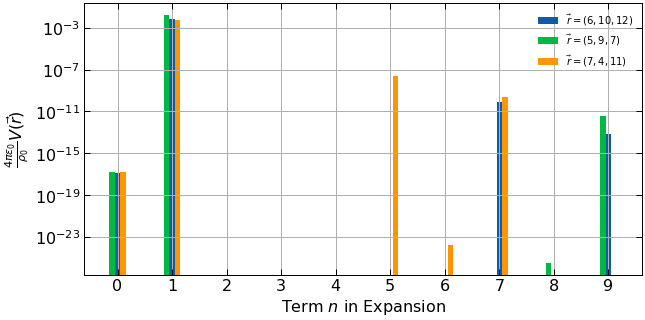

In [146]:
barWidth = 0.1
loc1 = ns
loc2 = ns-barWidth
loc3 = ns+barWidth

plt.figure(figsize=(10,5))
plt.grid()
plt.bar(loc1, terms_r1, width=barWidth, label=r'$\vec{r}=(6R,10R,12R)$')
plt.bar(loc2, terms_r2, width=barWidth, label=r'$\vec{r}=(5R,9R,7R)$')
plt.bar(loc3, terms_r3, width=barWidth, label=r'$\vec{r}=(7R,4R,11R)$')
plt.ylabel(r'$\frac{4 \pi \epsilon_0}{\rho_0}V(\vec{r}) $')
plt.xlabel('Term $n$ in Expansion')
plt.semilogy()
plt.minorticks_off()
plt.xticks(ns)
plt.legend(loc='upper right', fontsize=10)
plt.show()

## Part 2
Repeat part 1 for $N=2$.  Is there still a term that dominates in all cases?

In [147]:
ns = np.arange(0, 10)
terms_r1 = np.array([potential(6,10,12,n,2) for n in ns])
terms_r2 = np.array([potential(5,9,7,n,2) for n in ns])
terms_r3 = np.array([potential(7,4,11,n,2) for n in ns])

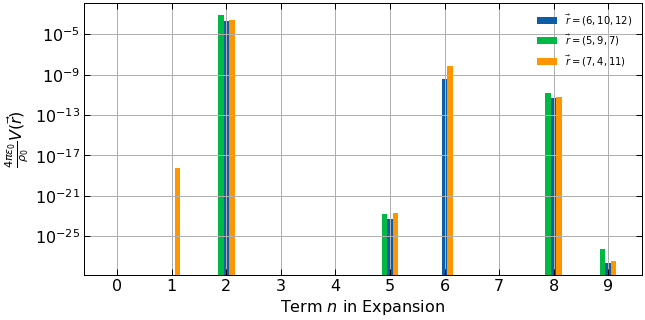

In [148]:
barWidth = 0.1
loc1 = ns
loc2 = ns-barWidth
loc3 = ns+barWidth

plt.figure(figsize=(10,5))
plt.grid()
plt.bar(loc1, terms_r1, width=barWidth, label=r'$\vec{r}=(6R,10R,12R)$')
plt.bar(loc2, terms_r2, width=barWidth, label=r'$\vec{r}=(5R,9R,7R)$')
plt.bar(loc3, terms_r3, width=barWidth, label=r'$\vec{r}=(7R,4R,11R)$')
plt.ylabel(r'$\frac{4 \pi \epsilon_0}{\rho_0}V(\vec{r}) $')
plt.xlabel('Term $n$ in Expansion')
plt.semilogy()
plt.minorticks_off()
plt.xticks(ns)
plt.legend(loc='upper right', fontsize=10)
plt.show()

## Part 3
Repeat part 1 for $N=3$. Is there still a term that dominates in all cases? Why or why not? *Hint: If there is a term that dominates in all three cases, then examine more points*.

In [149]:
ns = np.arange(0, 10)
terms_r1 = np.array([potential(6,10,12,n,3) for n in ns])
terms_r2 = np.array([potential(5,9,7,n,3) for n in ns])
terms_r3 = np.array([potential(7,4,11,n,3) for n in ns])

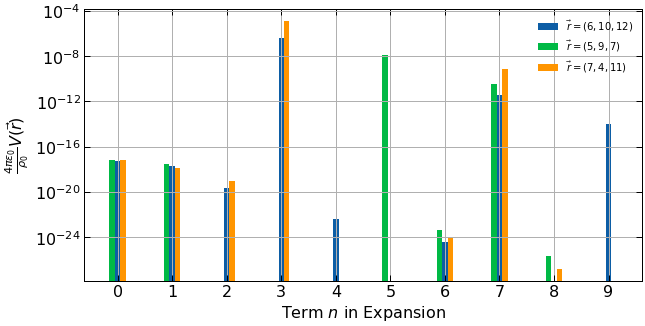

In [150]:
barWidth = 0.1
loc1 = ns
loc2 = ns-barWidth
loc3 = ns+barWidth

plt.figure(figsize=(10,5))
plt.grid()
plt.bar(loc1, terms_r1, width=barWidth, label=r'$\vec{r}=(6R,10R,12R)$')
plt.bar(loc2, terms_r2, width=barWidth, label=r'$\vec{r}=(5R,9R,7R)$')
plt.bar(loc3, terms_r3, width=barWidth, label=r'$\vec{r}=(7R,4R,11R)$')
plt.ylabel(r'$\frac{4 \pi \epsilon_0}{\rho_0}V(\vec{r}) $')
plt.xlabel('Term $n$ in Expansion')
plt.semilogy()
plt.minorticks_off()
plt.xticks(ns)
plt.legend(loc='upper right', fontsize=10)
plt.show()

There is no longer a term that dominates in all cases because this does not resemble an ideal dipole/quadropole/etc...